In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('stream_classify.csv')

#Tidak pakek ID dan gender
df = df.drop(columns=['ID'])

# AGE_GROUP : 
# ['50 to 54 years' '25 to 29 years' '30 to 39 years' 'Under 22 years'
#  '22 to 24 years' '40 to 49 years' '55 to 59 years' '60+ years' nan]

#dictionary ordinal termuda sampe tertua
age_group_mapping = {
    'Under 22 years': 1,
    '22 to 24 years': 2,
    '25 to 29 years': 3,
    '30 to 39 years': 4,
    '40 to 49 years': 5,
    '50 to 54 years': 6,
    '55 to 59 years': 7,
    '60+ years': 8
}

# UE_GROUP : 
# ['Under 12 Months' '24 to 59 Months' '60+ Months' '12 to 23 Months' nan]
# Map the values in the 'AGE_GROUP' column

#dictionary ordinal termuda sampe tertua
ue_group_mapping = {
  'Under 12 Months': 1,
  '12 to 23 Months' : 2,
  '24 to 59 Months': 3,
  '60+ Months' : 4
}

# EDUCATION_ADJ : 
# ['Degree' 'Diploma' '<Year 10' 'Year 10/11'
#  'Non-trade vocational education' 'Year 12/13' 'Grad Diploma/Cert'
#  'No schooling' 'Trade/TAFE' 'Post-graduate' 'UKN' nan 'Special Education'
#  'Ed Quals-Not volunteered']

#ini dictionary dari education terendah sampe tinggi (ordinal), aku nyari menurut google ae sih ini wkkwk.
education_mapping = {
    'No schooling': 1,
    '<Year 10': 2,
    'Year 10/11': 3,
    'Non-trade vocational education': 4,
    'Diploma': 5,
    'Trade/TAFE': 6,
    'Year 12/13': 7,
    'Grad Diploma/Cert': 8,
    'Degree': 9,
    'Post-graduate': 10,
    'Special Education': 11,
    'Ed Quals-Not volunteered': 12,
    'UKN': 13
}

#STREAM A DAN B DIGABUNG
stream_placement_desc_mapping = {
  'Stream A': 1,
  'Stream B': 1,
  'Stream C': 2
}

gender_mapping = {
  'Male':1,
  'Female':2
}
df['AGE_GROUP'] = df['AGE_GROUP'].map(age_group_mapping)
df['UE_GROUP'] = df['UE_GROUP'].map(ue_group_mapping)
df['EDUCATION_ADJ'] = df['EDUCATION_ADJ'].map(education_mapping)
df['STREAM_PLACEMENT_DESC'] = df['STREAM_PLACEMENT_DESC'].map(stream_placement_desc_mapping)
df['GENDER'] = df['GENDER'].map(gender_mapping)

df.head(20)

,JSKR_LINKAGE_KEY,STREAM_PLACEMENT_DESC,GENDER,INDIGENOUS,HOMELESS,PWD,CALD,REFUGEE,EX_OFFENDER,AGE_GROUP,UE_GROUP,EDUCATION_ADJ
0,1,1,2,0,0,0,1,0,0,6,1,9
1,2,2,2,0,1,0,0,0,0,3,3,5
2,7,2,1,0,0,1,0,0,0,4,4,2
3,12,2,2,0,1,1,0,0,0,4,3,3
4,13,1,2,0,0,0,0,0,0,1,1,3
5,14,2,1,0,0,1,0,0,0,2,4,4
6,15,1,2,0,0,0,0,0,0,3,1,4
7,16,2,1,0,1,1,0,0,0,3,4,2
8,17,2,1,1,0,1,0,0,1,5,2,3
9,18,1,1,0,0,1,0,0,0,4,2,7


In [4]:
#EDA
# Check the summary statistics of the dataframe
print(df.describe())

       JSKR_LINKAGE_KEY  STREAM_PLACEMENT_DESC         GENDER     INDIGENOUS  \
count     485972.000000          485972.000000  485972.000000  485972.000000   
mean      423007.810765               1.251210       1.419627       0.137710   
std       270699.192245               0.433709       0.493498       0.344595   
min            1.000000               1.000000       1.000000       0.000000   
25%       176844.750000               1.000000       1.000000       0.000000   
50%       406187.000000               1.000000       1.000000       0.000000   
75%       660217.500000               2.000000       2.000000       0.000000   
max       912603.000000               2.000000       2.000000       1.000000   

            HOMELESS            PWD           CALD        REFUGEE  \
count  485972.000000  485972.000000  485972.000000  485972.000000   
mean        0.140889       0.276658       0.172921       0.061108   
std         0.347907       0.447346       0.378180       0.239529   
min

REGION EDA START

In [5]:
# Check for missing values
print(df.isnull().sum())
#Result -> tidak ada missing values

JSKR_LINKAGE_KEY         0
STREAM_PLACEMENT_DESC    0
GENDER                   0
INDIGENOUS               0
HOMELESS                 0
PWD                      0
CALD                     0
REFUGEE                  0
EX_OFFENDER              0
AGE_GROUP                0
UE_GROUP                 0
EDUCATION_ADJ            0
dtype: int64


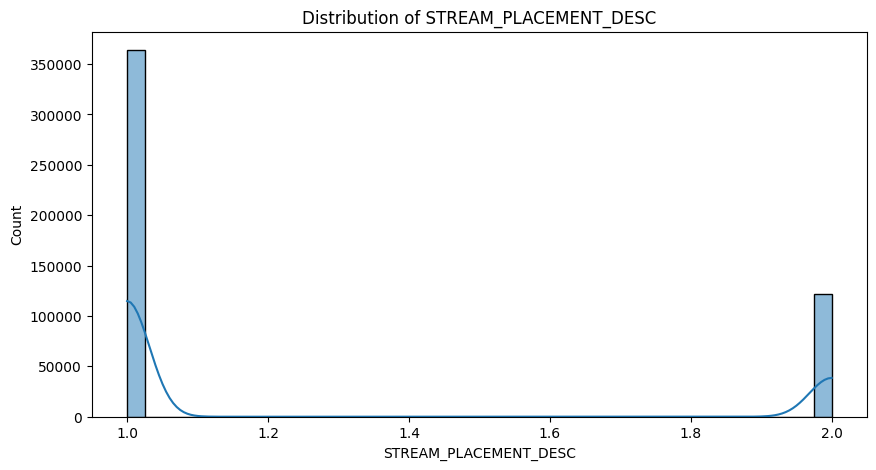

In [6]:
# Visualize the distribution of each feature
def plot_distribution(column_index=0):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=df.columns[column_index], kde=True)
    plt.title(f'Distribution of {df.columns[column_index]}')
    plt.show()
    
# plot_distribution(0)
plot_distribution(1)
# plot_distribution(2)
# plot_distribution(3)
# plot_distribution(4)

#ini di uncomment kalau mau ngeplot semua column
# for column in df.columns:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(data=df, x=column, kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()

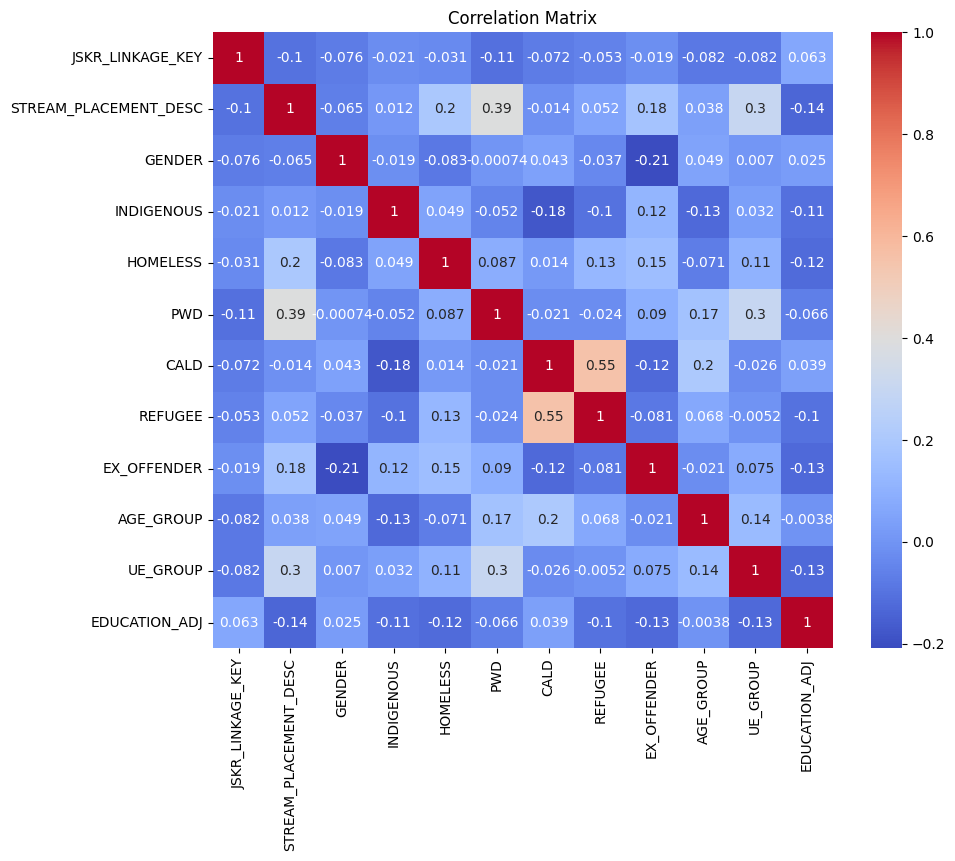

In [7]:
# Check the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#REGION EDA END

#REGION OUTLIER DETECTION START